In [771]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [772]:
dataset = pd.read_csv('train_.csv')

In [773]:
dataset.shape

(1460, 81)

In [774]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [775]:
dataset.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [776]:
# Посмотрим на параметры того как распределён целевой признак. 
dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [777]:
# Удалим столбец Id
dataset.drop(columns=['Id'], axis = 1, inplace = True)

In [778]:
# Оценим пропуски
dataset.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [779]:
# Первые 6 удаляем, много пропусков
dataset.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 1, inplace=True)
dataset.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrArea       8
MasVnrType       8
Electrical       1
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
KitchenQual      0
dtype: int64

In [780]:
# Пропуски в процентах от общего числа
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) / len(df)*100, 2)
    temp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(dataset)

,Total,Percent
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
GarageCond,81,5.55
BsmtFinType2,38,2.60
BsmtExposure,38,2.60
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtFinType1,37,2.53


In [781]:
dataset.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [782]:
# Пропуски в категориальных признаках (тип object) заполним как UNKNOWN, а числовые возьмем медиану
def HandleMissingValues(df):
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'UNKNOWN'

    for a in num_cols:
        values[a] = df[a].median()
        
    df.fillna(value=values, inplace=True)
    
    
HandleMissingValues(dataset)
dataset.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [783]:
# Проверим на пропуски. Их нет
dataset.isnull().sum().sum()

0

In [784]:
# Разобьём категориальные признаки на числовые столбцы.
def getObjectColumnsList(df):
    return [cname for cname in df.columns if df[cname].dtype == "object"]

def PerformOneHotEncoding(df, columnsToEncode):
    return pd.get_dummies(df, columns=columnsToEncode)

cat_cols = getObjectColumnsList(dataset)
dataset = PerformOneHotEncoding(dataset, cat_cols)
dataset.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


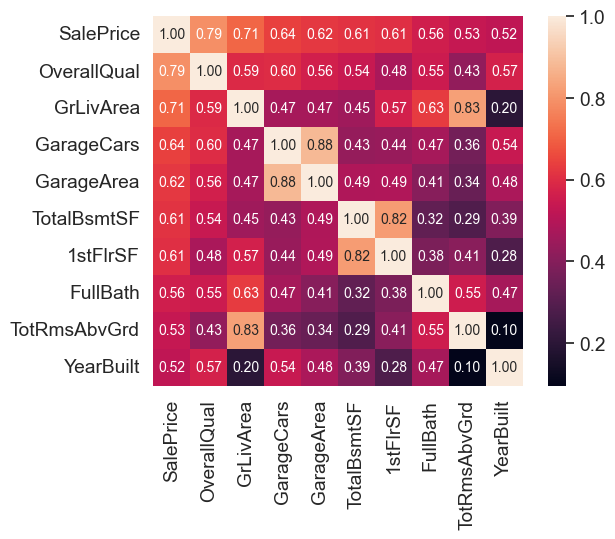

In [785]:
# Посмотрим корреляцию. Тк признаков очень много, то выведем топ 10 коррелирующих в SalePrice
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\igl\AppData\Local\Temp\ipykernel_8964\2964101725.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
C:\Users\igl\AppData\Local\Temp\ipykernel_8964\2964101725.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(grid[0,0])


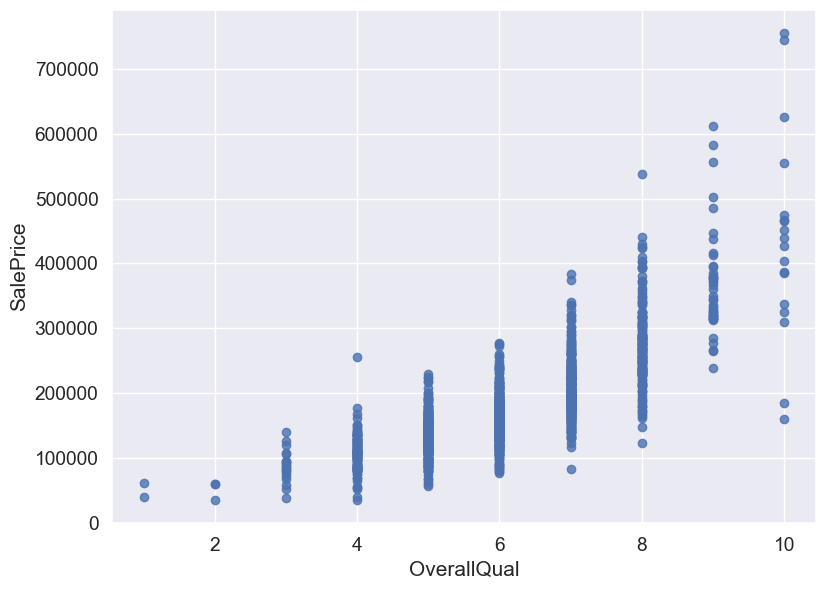

In [786]:
# Теперь надо посмотреть на наличие выбросов у топовых по корреляции признаков и при необходимости удалить выбросы.
# Начинаем с OverallQual
from scipy.stats.stats import pearsonr
grid = plt.GridSpec(2,3,wspace=0.15,hspace=0.25) 
plt.subplots(figsize=(30,15))
plt.subplot(grid[0,0])
g = sns.regplot(x=dataset['OverallQual'], y=dataset['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(dataset['OverallQual'], dataset['SalePrice'])[0]))


C:\Users\igl\AppData\Local\Temp\ipykernel_8964\2169091166.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(grid[0,0])


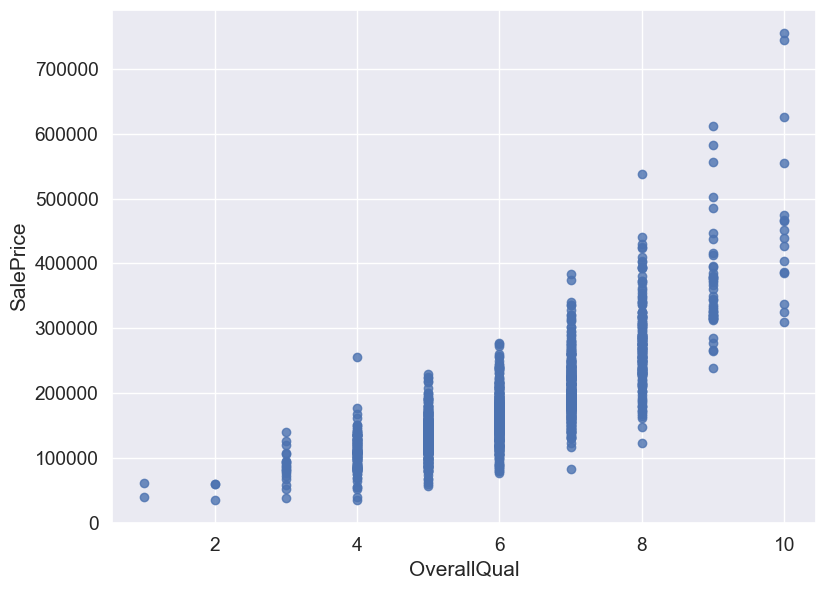

In [787]:
# Видим при значении 10 выбросы с очень низкой ценой. Удалим их
dataset = dataset.drop(dataset[(dataset['OverallQual'] == 10) & (dataset['SalePrice'] < 220000)].index)

grid = plt.GridSpec(2,3,wspace=0.15,hspace=0.25) 
plt.subplots(figsize=(30,15))
plt.subplot(grid[0,0])
g = sns.regplot(x=dataset['OverallQual'], y=dataset['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(dataset['OverallQual'], dataset['SalePrice'])[0]))

C:\Users\igl\AppData\Local\Temp\ipykernel_8964\2089708267.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
C:\Users\igl\AppData\Local\Temp\ipykernel_8964\2089708267.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(grid[0,0])


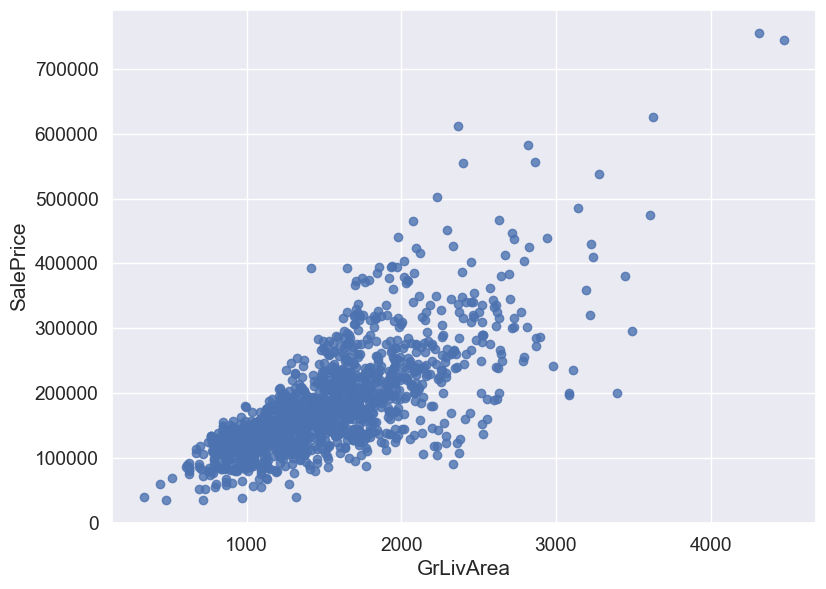

In [788]:
# GrLivArea
from scipy.stats.stats import pearsonr
grid = plt.GridSpec(2,3,wspace=0.15,hspace=0.25) 
plt.subplots(figsize=(30,15))
plt.subplot(grid[0,0])
g = sns.regplot(x=dataset['GrLivArea'], y=dataset['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(dataset['GrLivArea'], dataset['SalePrice'])[0]))

In [789]:
# Здесь выбросов нет

C:\Users\igl\AppData\Local\Temp\ipykernel_8964\1796175939.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(grid[0,0])


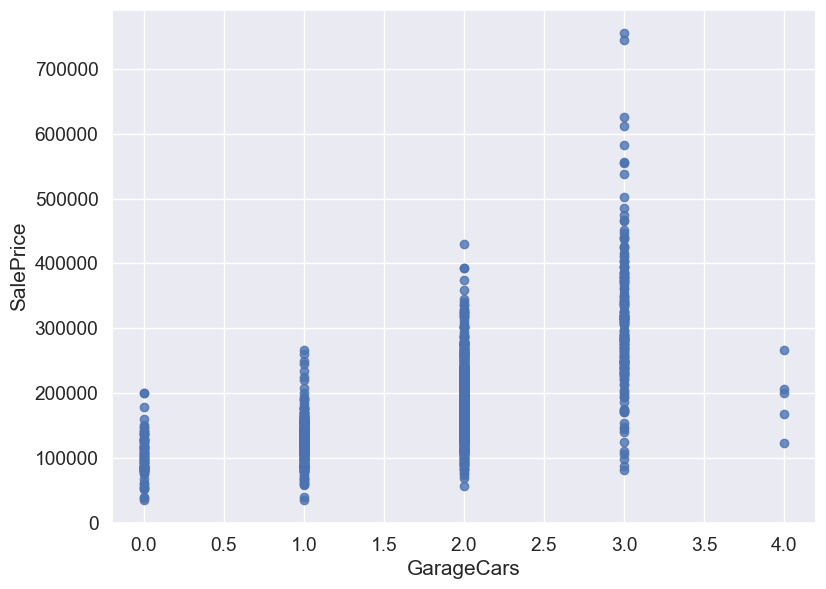

In [790]:
# GarageCars
grid = plt.GridSpec(2,3,wspace=0.15,hspace=0.25) 
plt.subplots(figsize=(30,15))
plt.subplot(grid[0,0])
g = sns.regplot(x=dataset['GarageCars'], y=dataset['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(dataset['GarageCars'], dataset['SalePrice'])[0]))

In [791]:
# Есть наличие гаражей с местами под 4 авто и низкой ценой. Удаляем
dataset = dataset.drop(dataset[(dataset['GarageCars'] == 4) & (dataset['SalePrice'] < 300000)].index)

C:\Users\igl\AppData\Local\Temp\ipykernel_8964\1372693329.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(grid[0,0])


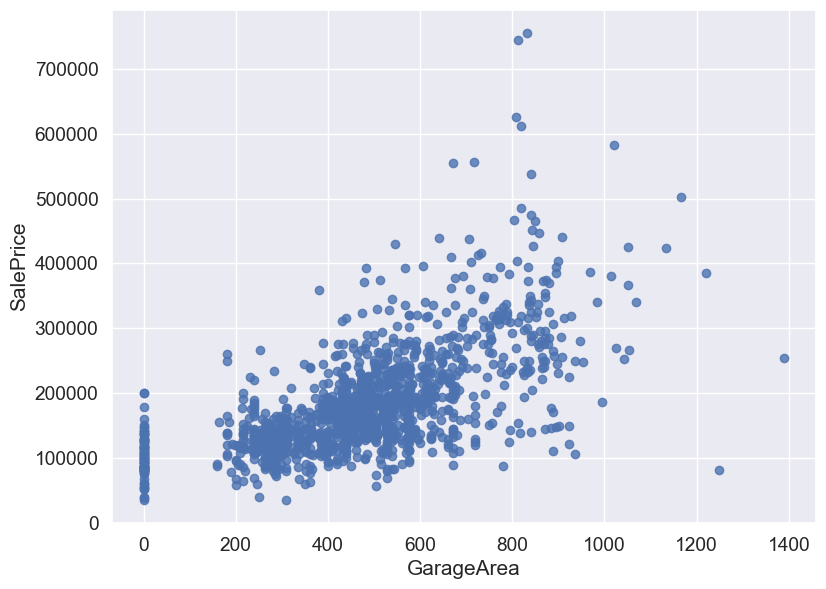

In [792]:
# GarageArea
grid = plt.GridSpec(2,3,wspace=0.15,hspace=0.25) 
plt.subplots(figsize=(30,15))
plt.subplot(grid[0,0])
g = sns.regplot(x=dataset['GarageArea'], y=dataset['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(dataset['GarageArea'], dataset['SalePrice'])[0]))

In [793]:
# Явно два выброса. Удалим
dataset = dataset.drop(dataset[(dataset['GarageArea'] > 1200) & (dataset['SalePrice'] < 300000)].index)

In [794]:
# По хорошему надо пройтись далее по всем коррелирующим с ценой продажи признакам, но для данной работы достаточно.
# Для обучения разделим выборку 80 на 20
from sklearn.model_selection import train_test_split
X = dataset.drop('SalePrice', axis =1 )
y = dataset['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=155)

In [795]:
# Обучим с обычной функцией линейной регрессии.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)

pipeline.fit(X_train, y_train)
print('R2:', pipeline.score(X_test, y_test))

R2: -5.484124885344531e+20


In [796]:
# Результат неудовлетворителен
# Попробуем поменять метод нормализации

In [797]:
pipeline = make_pipeline(
    MinMaxScaler(),
    LinearRegression(),
)

pipeline.fit(X_train, y_train)
print('R2:', pipeline.score(X_test, y_test))

R2: -1.2355472946896658e+18


In [798]:
# Не помогло. 
# Данный результат обусловлен тем, что сами признаки существенно коррелируют между собой и все эти зависимые пары необходимо было почистить, убрав лишние.
# Тогда можно было и применить данную функцию. Но тк есть методы учитывающие корреляцию между признаками, воспользуемся ими

In [799]:
# Начнем с Ridge
pipeline = make_pipeline(
    StandardScaler(),
    Ridge(),
)

pipeline.fit(X_train, y_train)
print('R2:', pipeline.score(X_test, y_test))

R2: 0.8987134714763885


In [800]:
# Результат сразу координально вырос

In [801]:
# Лассо
pipeline = make_pipeline(
    StandardScaler(),
    Lasso(),
)

pipeline.fit(X_train, y_train)
print('R2:', pipeline.score(X_test, y_test))

R2: 0.8986260640926822


c:\Users\igl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+10, tolerance: 7.371e+08
  model = cd_fast.enet_coordinate_descent(


In [802]:
# Сменим метод нормирования. Стало немного лучше
pipeline = make_pipeline(
    MinMaxScaler(),
    Ridge(),
)

pipeline.fit(X_train, y_train)
print('R2:', pipeline.score(X_test, y_test))

R2: 0.9051213035721162


In [803]:
# Тоже для Лассо. Изменения незначительны, в лучшую сторону
pipeline = make_pipeline(
    MinMaxScaler(),
    Lasso(),
)

pipeline.fit(X_train, y_train)
print('R2:', pipeline.score(X_test, y_test))

R2: 0.8996619540919325


c:\Users\igl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.401e+09, tolerance: 7.371e+08
  model = cd_fast.enet_coordinate_descent(


In [804]:
# Попробуем HuberRegressor
from sklearn.linear_model import HuberRegressor
pipeline = make_pipeline(
    StandardScaler(),
    HuberRegressor(),
)

pipeline.fit(X_train, y_train)
print('R2:', pipeline.score(X_test, y_test))


R2: 0.9063198523191316


c:\Users\igl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [805]:
# HuberRegressor с измененной нормировкой
from sklearn.linear_model import HuberRegressor
pipeline = make_pipeline(
    MinMaxScaler(),
    HuberRegressor(),
)

pipeline.fit(X_train, y_train)
print('R2:', pipeline.score(X_test, y_test))


R2: 0.906644687209962


c:\Users\igl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


В целом все методы учитывающие корреляцию между признаками дали неплохой результат R2 в районе 0.9. Причем изменение разбиения данных на разные тестовую и проверочную выборки не дают ощутимых изменений результата (изменяем random_state), что говорит о стабильности модели. 

Считаю что данный подход (Ridge, Lasso, Huber с нормированием MinMax) предпочтительней, тк для применения линейной регрессии необходимо было бы убрать гораздо больше признаков. А это больше работы раз и возможно "обиднее" для заказчика два - он же эти данные старался собирал.